In [ ]:
!pip install -e ..

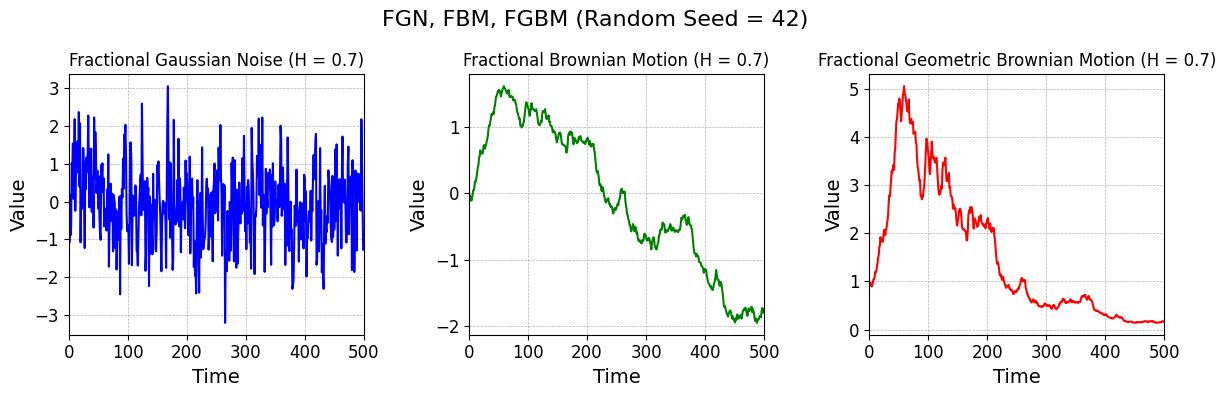

In [15]:
from hurst_estimators import generate_fbm, generate_fgn, generate_fgbm
import matplotlib.pyplot as plt
import numpy as np

# Generate data
length = 500
hurst = 0.7
seed = 42

fgn = generate_fgn(length, hurst, seed=seed)
fbm = generate_fbm(length, hurst, seed=seed)
fgbm = generate_fgbm(length, hurst, seed=seed)

fig, axs = plt.subplots(1, 3, sharey=False, figsize=(12, 4))
axs = axs.flatten()

for ax in axs:
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Value', fontsize=14)

# Plot Gaussian Noise
axs[0].plot(fgn, color='blue')
axs[0].set_title(f"Fractional Gaussian Noise (H = {hurst})", fontsize=12)
axs[0].set_xlim([0, length])

# Plot Brownian Motion
axs[1].plot(fbm, color='green')
axs[1].set_title(f"Fractional Brownian Motion (H = {hurst})", fontsize=12)
axs[1].set_xlim([0, length])

# Plot Geometric Brownian Motion
axs[2].plot(fgbm, color='red')
axs[2].set_title(f"Fractional Geometric Brownian Motion (H = {hurst})", fontsize=12)
axs[2].set_xlim([0, length])

# Adjust layout and save the figure
plt.suptitle(f"FGN, FBM, FGBM (Random Seed = {seed})", fontsize=16)
plt.tight_layout()
plt.savefig('./figures/fgn_fbm_fgbm.png', dpi=300)
plt.show()

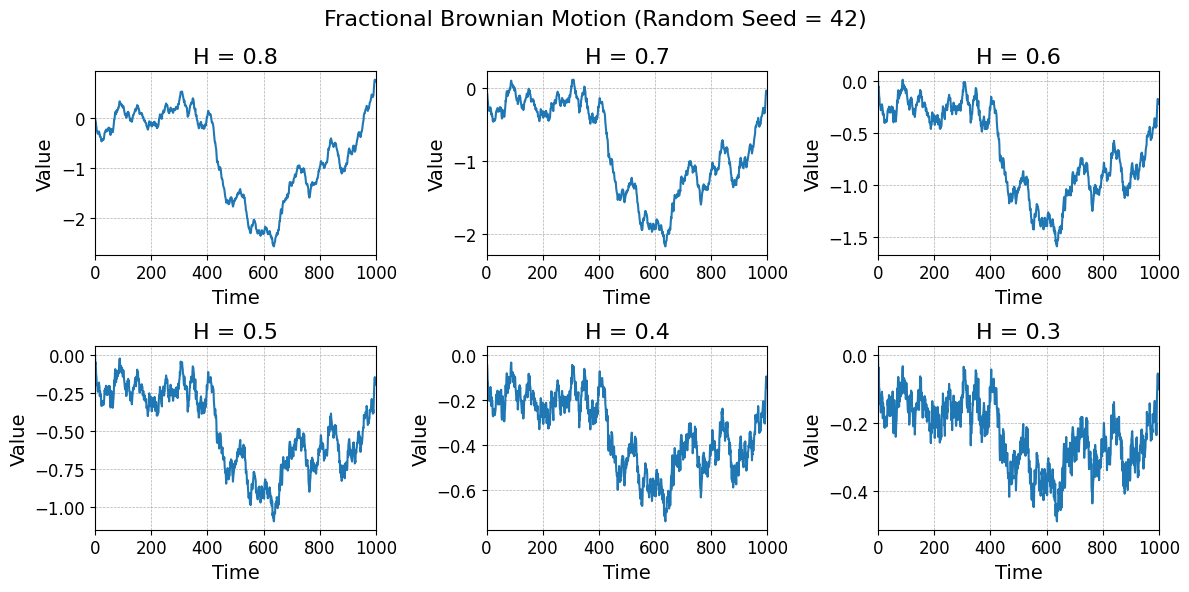

In [25]:
import matplotlib.pyplot as plt
from hurst_estimators import generate_fbm
import numpy as np

seed = 42

# Set up figure and axes
fig, axs = plt.subplots(2, 3, figsize=(12, 6), sharey=False)
axs = axs.flatten()

# Set common properties for all subplots
for ax in axs:
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Value', fontsize=14)

# Plot fractional Brownian motion for different Hurst exponents
for i in range(2, 8):
    fbm = generate_fbm(1000,  1 - i / 10, seed=seed)
    axs[i-2].plot(fbm)
    axs[i-2].set_title(f'H = {1 - i / 10:.1f}', fontsize=16)
    axs[i-2].set_xlim([0, 1000])

# Adjust layout and save the figure
plt.suptitle(f"Fractional Brownian Motion (Random Seed = {seed})", fontsize=16)
plt.tight_layout()
plt.savefig('./figures/fbm_hurst_values.png', dpi=300)
plt.show()


In [31]:
import hurst_estimators as he
from hurst_estimators import periodogram_estimator, generate_fgn

# generate Gaussian Noise
gn = generate_fgn(10000, 0.5)

# use wavelet_estimator (or the estimator of your choice)
hurst, slope, intercept, log_freqs, log_psd = periodogram_estimator(gn)
print(hurst)

0.5016872094565624


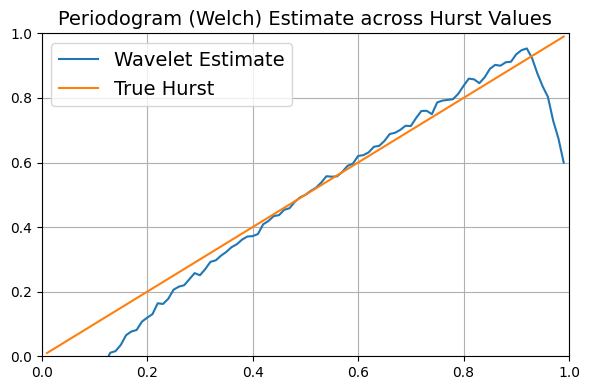

In [13]:

hurst_estimates = []
hurst_range = [h / 100. for h in range(1, 100, 1)]
N = 10_000
for h in hurst_range:
    gn = generate_fgn(N, h)
    # hurst, _, _, _, _ = wavelet_estimator(gn, method="awc", wavelet="db32")
    hurst, _, _, _, _ = periodogram_estimator(gn, method="welch", nperseg=512)
    # hurst, _, _, _, _ = central_estimator(gn, N // 4, r=1)
    # hurst, _, _, _, _ = dfa_estimator(gn, 20)
    # hurst, _, _, _, _ = higuchi_estimator(gn, 200, max_window_size=N // 4)
    # hurst, _, _, _, _ = ghe_estimator(gn, 2)
    # hurst, _, _, _, _ = rs_estimator(gn, w=20)
    hurst_estimates.append(hurst)

plt.figure(figsize=(6, 4))
plt.plot(hurst_range, hurst_estimates, label="Wavelet Estimate")
plt.plot(hurst_range, hurst_range, label="True Hurst")
plt.legend(fontsize=14)
plt.grid("on")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Periodogram (Welch) Estimate across Hurst Values", fontsize=14)
# plt.xlabel("True Hurst (Circulant Embedding Method)", fontsize=14)
# plt.ylabel("Estimated Hurst", fontsize=14)
plt.tight_layout()
plt.show()

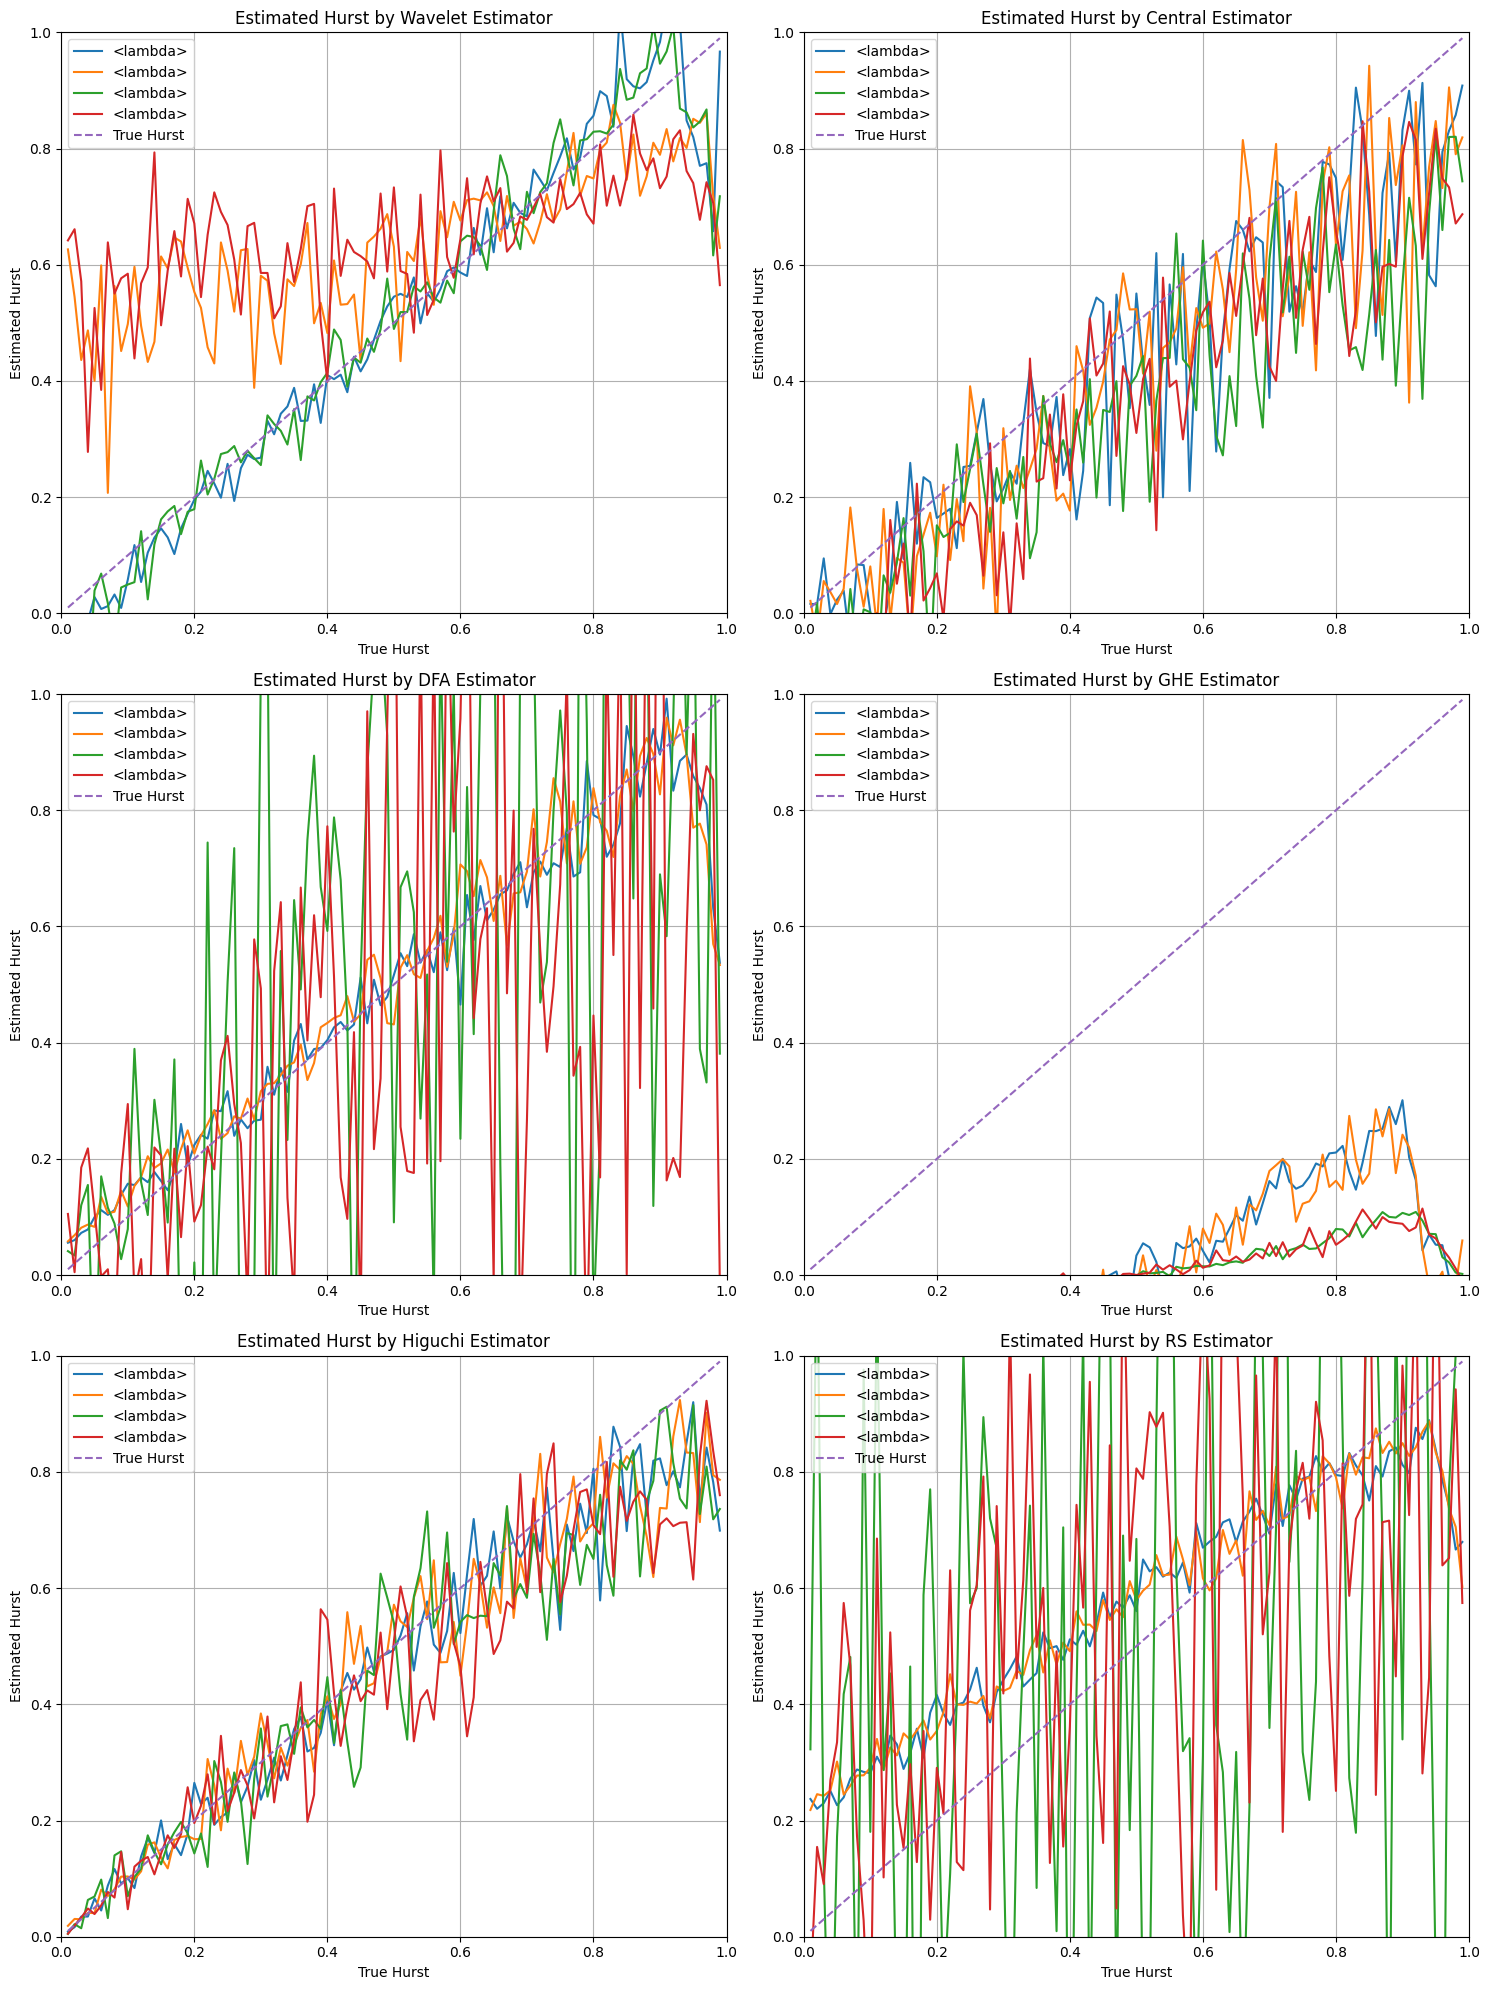

In [452]:
import numpy as np
import matplotlib.pyplot as plt
from hurst_estimators import generate_fgn
from hurst_estimators import wavelet_estimator, periodogram_estimator, central_estimator, dfa_estimator, higuchi_estimator, ghe_estimator, rs_estimator

# Define the options for each estimator
estimator_options = {
    "Wavelet Estimator": [
        lambda X: wavelet_estimator(X, method="awc", wavelet="db32"),
        lambda X: wavelet_estimator(X, method="awc", wavelet="db2"),
        lambda X: wavelet_estimator(X, method="vvl", wavelet="db32"),
        lambda X: wavelet_estimator(X, method="vvl", wavelet="db2")
    ],
    "Central Estimator": [
        lambda X: central_estimator(X, N // 4, r=1, num_sizes=20),
        lambda X: central_estimator(X, N // 4, r=1, num_sizes=100),
        lambda X: central_estimator(X, N // 4, r=4, num_sizes=20),
        lambda X: central_estimator(X, N // 4, r=4, num_sizes=100)
    ],
    "DFA Estimator": [
        lambda X: dfa_estimator(X, w=10, alpha=0.95),
        lambda X: dfa_estimator(X, w=10, alpha=0.99),
        lambda X: dfa_estimator(X, w=30, alpha=0.95),
        lambda X: dfa_estimator(X, w=30, alpha=0.99)
    ],
    "GHE Estimator": [
        lambda X: ghe_estimator(X, max_tau=2, q=2),
        lambda X: ghe_estimator(X, max_tau=2, q=5),
        lambda X: ghe_estimator(X, max_tau=30, q=2),
        lambda X: ghe_estimator(X, max_tau=30, q=5)
    ],
    "Higuchi Estimator": [
        lambda X: higuchi_estimator(X, min_window_size=2, max_window_size=100, num_windows=20),
        lambda X: higuchi_estimator(X, min_window_size=2, max_window_size=100, num_windows=50),
        lambda X: higuchi_estimator(X, min_window_size=5, max_window_size=200, num_windows=20),
        lambda X: higuchi_estimator(X, min_window_size=5, max_window_size=200, num_windows=50)
    ],
    "RS Estimator": [
        lambda X: rs_estimator(X, w=10, alpha=0.95),
        lambda X: rs_estimator(X, w=10, alpha=0.99),
        lambda X: rs_estimator(X, w=30, alpha=0.95),
        lambda X: rs_estimator(X, w=30, alpha=0.99)
    ]
}

# Hurst range and number of points
hurst_range = [h / 100. for h in range(1, 100, 1)]
N = 1_000

# Prepare for subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Loop over each estimator and plot
for ax, (name, options) in zip(axes, estimator_options.items()):
    for option in options:
        hurst_estimates = []
        for h in hurst_range:
            fgn = generate_fgn(N, h)
            hurst, _, _, _, _ = option(fgn)
            hurst_estimates.append(hurst)
        ax.plot(hurst_range, hurst_estimates, label=option.__name__)
    ax.plot(hurst_range, hurst_range, label="True Hurst", linestyle="--")
    ax.legend()
    ax.grid(True)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title(f"Estimated Hurst by {name}")
    ax.set_xlabel("True Hurst")
    ax.set_ylabel("Estimated Hurst")

plt.tight_layout()
# plt.savefig('hurst_estimates_comparison.png', dpi=300)
plt.show()


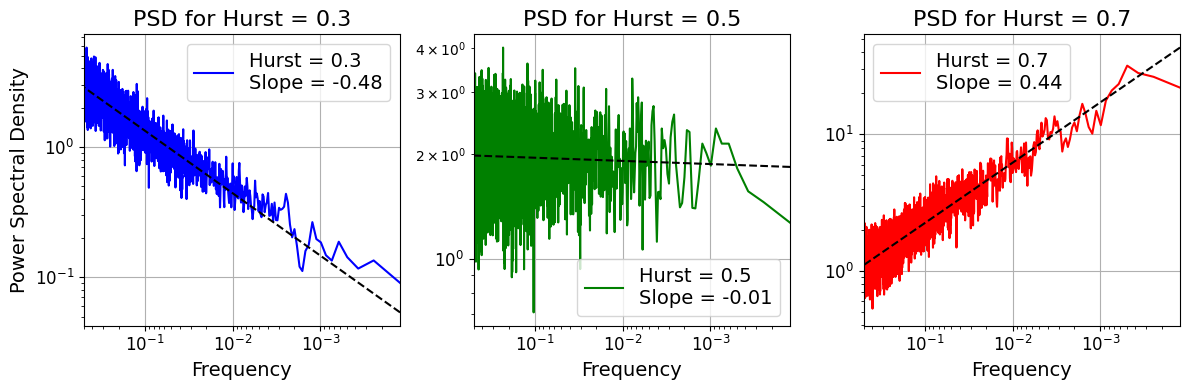

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hurst_estimators import generate_fgn, periodogram_estimator

# Hurst values
hurst_values = [0.3, 0.5, 0.7]
colors = ['blue', 'green', 'red']
N = 100_000  # Number of points

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

for i, (hurst, color) in enumerate(zip(hurst_values, colors)):
    fgn = generate_fgn(N, hurst=hurst)
    
    # Compute Power Spectral Density
    hurst_estimated, slope, intercept, log_frequencies, log_psd = periodogram_estimator(fgn, method="welch", nperseg=8096)
    # hurst_estimated, slope, intercept, log_frequencies, log_psd = periodogram_estimator(fgn)

    # Plot the PSD
    axes[i].loglog(np.exp(log_frequencies), np.exp(log_psd), color=color, label=f'Hurst = {hurst}\nSlope = {-slope:.2f}')
    axes[i].set_title(f'PSD for Hurst = {hurst}', fontsize=16)
    axes[i].set_xlabel('Frequency', fontsize=14)
    axes[i].set_xlim([np.exp(log_frequencies)[0], np.exp(log_frequencies)[-1]])
    axes[i].grid(True)
    axes[i].legend(fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].invert_xaxis()
    # Add the fit line
    fit_line = intercept + slope * log_frequencies
    axes[i].loglog(np.exp(log_frequencies), np.exp(fit_line), color='black', linestyle='--')

axes[0].set_ylabel('Power Spectral Density', fontsize=14)
plt.tight_layout()
plt.savefig('./figures/1_over_f.png', dpi=300)
# Save the plot as a high-resolution image
plt.show()


In [17]:
def compute_acf(series, max_lag):
    n = len(series)
    data = np.asarray(series)
    mean = np.mean(data)
    c0 = np.var(data)

    acf = np.correlate(data - mean, data - mean, mode='full') / (n * c0)
    acf = acf[n-1:n+max_lag-1]
    return acf

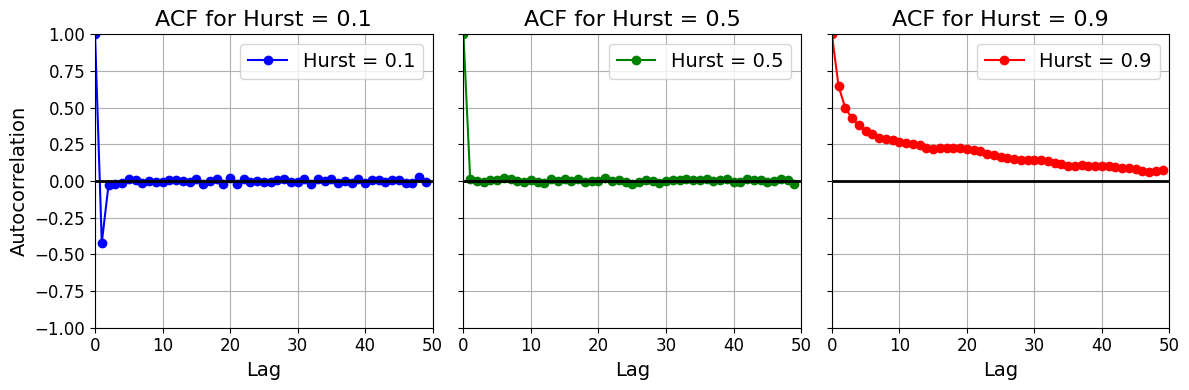

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from hurst_estimators import generate_fgn

# Hurst values
hurst_values = [0.1, 0.5, 0.9]
colors = ['blue', 'green', 'red']
max_lag = 50  # Maximum lag for ACF

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

N = 10_000
for i, (hurst, color) in enumerate(zip(hurst_values, colors)):
    fgn = generate_fgn(N, hurst=hurst)
    acf = compute_acf(fgn, max_lag)
    
    axes[i].plot(acf, marker='o', color=color, label=f'Hurst = {hurst}')
    axes[i].set_title(f'ACF for Hurst = {hurst}', fontsize=16)
    axes[i].set_xlabel('Lag', fontsize=14)
    axes[i].set_xlim([0, max_lag])
    axes[i].set_ylim([-1, 1])
    axes[i].grid(True)
    axes[i].legend(fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].axhline(0, color='black', linewidth=2)

axes[0].set_ylabel('Autocorrelation', fontsize=14)
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig('./figures/acf_plot.png', dpi=300)
plt.show()


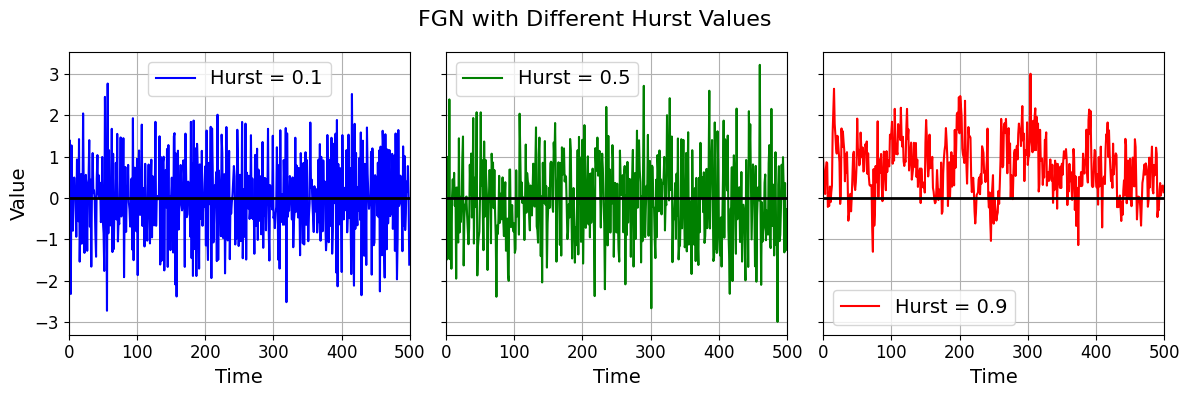

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from hurst_estimators import generate_fgn

# Hurst values
hurst_values = [0.1, 0.5, 0.9]
colors = ['blue', 'green', 'red']
N = 500 # Length of the fGn series

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for i, (hurst, color) in enumerate(zip(hurst_values, colors)):
    fgn = generate_fgn(N, hurst=hurst)
    
    axes[i].plot(fgn, color=color, label=f'Hurst = {hurst}')
    # axes[i].set_title(f'Time Series for Hurst = {hurst}', fontsize=16)
    axes[i].set_xlabel('Time', fontsize=14)
    axes[i].set_xlim([0, N])
    axes[i].grid(True)
    axes[i].legend(fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].axhline(0, color='black', linewidth=2)

plt.suptitle("FGN with Different Hurst Values", fontsize=16)
axes[0].set_ylabel('Value', fontsize=14)
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig('./figures/time_series_hurst_values_fgn.png', dpi=300)
plt.show()


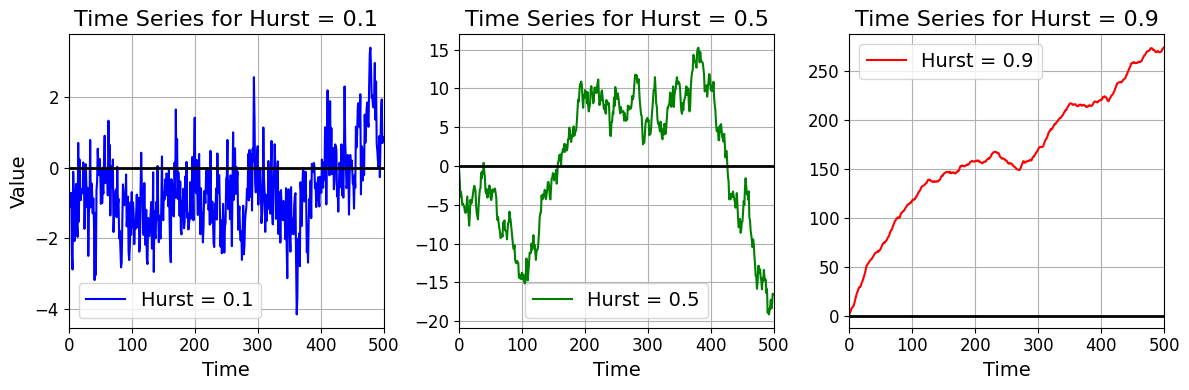

In [341]:
import numpy as np
import matplotlib.pyplot as plt
from hurst_estimators import generate_fgn

# Hurst values
hurst_values = [0.1, 0.5, 0.9]
colors = ['blue', 'green', 'red']
N = 500  # Length of the fGn series

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

for i, (hurst, color) in enumerate(zip(hurst_values, colors)):
    fgn = generate_fgn(N, hurst=hurst)
    fbm = np.cumsum(fgn)  # Generate fBm by taking the cumulative sum of fGn
    axes[i].plot(fbm, color=color, label=f'Hurst = {hurst}')
    axes[i].set_title(f'Time Series for Hurst = {hurst}', fontsize=16)
    axes[i].set_xlabel('Time', fontsize=14)
    axes[i].set_xlim([0, N])
    axes[i].grid(True)
    axes[i].legend(fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].axhline(0, color='black', linewidth=2)

axes[0].set_ylabel('Value', fontsize=14)
plt.tight_layout()

# Save the plot as a high-resolution image
plt.show()


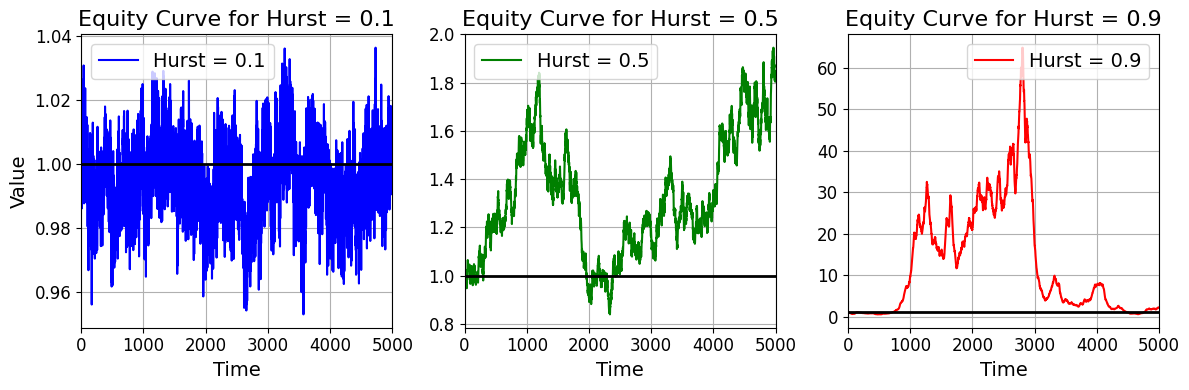

In [362]:
import numpy as np
import matplotlib.pyplot as plt
from hurst_estimators import generate_fgn

def generate_flnm(N, hurst, initial_value=1, normalization_factor=100):
    fgn = generate_fgn(N, hurst=hurst)
    log_process = np.cumsum(fgn) / normalization_factor  # Normalize the cumulative sum
    process = initial_value * np.exp(log_process)  # Exponentiate to get the process
    return process

# Hurst values
hurst_values = [0.1, 0.5, 0.9]
colors = ['blue', 'green', 'red']
N = 5000  # Length of the series

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

for i, (hurst, color) in enumerate(zip(hurst_values, colors)):
    flnm = generate_flnm(N, hurst=hurst)
    
    axes[i].plot(flnm, color=color, label=f'Hurst = {hurst}')
    axes[i].set_title(f'Equity Curve for Hurst = {hurst}', fontsize=16)
    axes[i].set_xlabel('Time', fontsize=14)
    axes[i].set_xlim([0, N])
    axes[i].grid(True)
    axes[i].legend(fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].axhline(1, color='black', linewidth=2)  # Reference line for the initial value

axes[0].set_ylabel('Value', fontsize=14)
plt.tight_layout()

# Save the plot as a high-resolution image
plt.show()


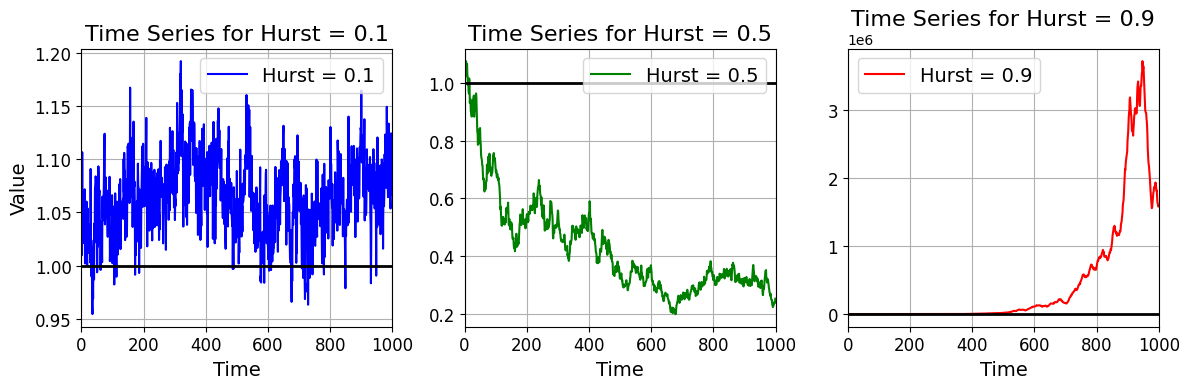

In [449]:
import numpy as np
import matplotlib.pyplot as plt
from hurst_estimators import generate_fgn

def generate_fgbm(N, hurst, mu=.5, sigma=1, initial_value=1):
    dt = 1 / N
    t = np.linspace(0, 1, N)
    
    fgn = generate_fgn(N, hurst=hurst)
    fbm = np.cumsum(fgn) * np.sqrt(dt)  # Correct scaling by sqrt(dt)
    
    drift = (mu - 0.5 * sigma**2) * t
    diffusion = sigma * fbm
    fgbm = initial_value * np.exp(drift + diffusion)
    
    return fgbm

# Hurst values
hurst_values = [0.1, 0.5, 0.9]
colors = ['blue', 'green', 'red']
N = 1000  # Length of the series

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

for i, (hurst, color) in enumerate(zip(hurst_values, colors)):
    fgbm = generate_fgbm(N, hurst=hurst)
    
    axes[i].plot(fgbm, color=color, label=f'Hurst = {hurst}')
    axes[i].set_title(f'Time Series for Hurst = {hurst}', fontsize=16)
    axes[i].set_xlabel('Time', fontsize=14)
    axes[i].set_xlim([0, N])
    axes[i].grid(True)
    axes[i].legend(fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].axhline(1, color='black', linewidth=2)  # Reference line for the initial value

axes[0].set_ylabel('Value', fontsize=14)
plt.tight_layout()

# Save the plot as a high-resolution image
# plt.savefig('fgbm_time_series.png', dpi=300)
plt.show()
